In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import data
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/FreeCodeCamp/Python Certification - Projects/medical_examination.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# First calculate and store BMI
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
# Check if BMI > 25 and type cast to int
df['overweight'] = (df['BMI'] > 25).astype(int)
df.head()

In [ ]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df.cholesterol == 1, 'cholesterol'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1
df.loc[df.gluc == 1, 'gluc'] = 0
df.loc[df.gluc > 1, 'gluc'] = 1
df.head()

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df[["cardio", 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']], id_vars="cardio")

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
  
    #df_cat = None

    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot(x="variable", col="cardio", hue="value", data=df_cat, kind="count", sharey=True)
    graph.set_axis_labels("variable", "total")
  
    fig = graph.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df2 = df.copy()
    # drop the BMI column
    df2.drop(columns=['BMI'], inplace = True)

    # Keep only the following patient segments that represent correct data
    df_heat = df2[(df2['ap_lo'] <= df2['ap_hi']) & 
                (df2['height'] >= df2['height'].quantile(0.025)) & (df2['height'] <= df2['height'].quantile(0.975)) & 
                (df2['weight'] >= df2['weight'].quantile(0.025)) & (df2['weight'] <= df2['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize = (12,6))
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    #fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(corr, mask=mask, square=True, linewidths=1, center=0.0, vmin=-0.1, vmax=0.3, annot=True, fmt='.1f').get_figure()
  
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

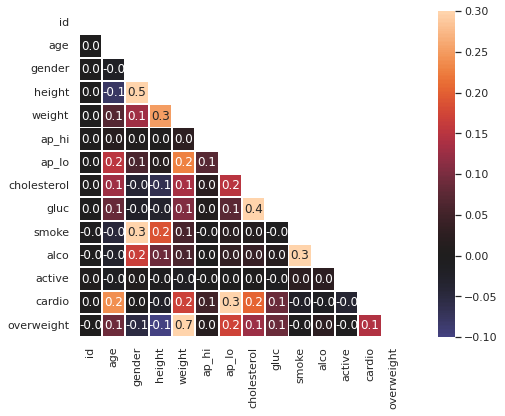

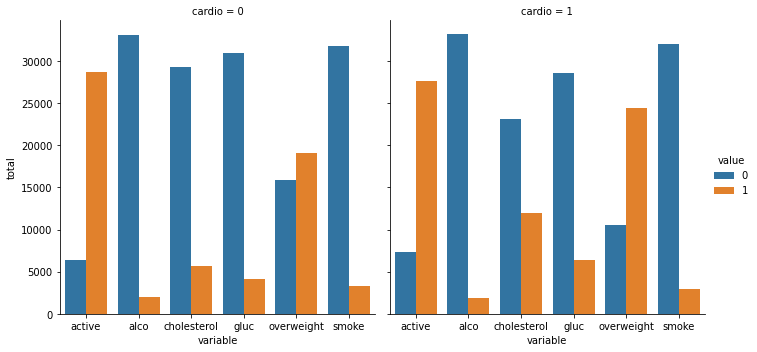

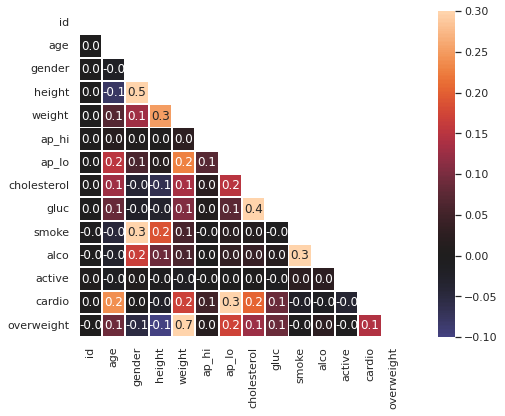

In [ ]:
draw_cat_plot()
draw_heat_map()